# Matrix Multiplication <br>
Importing algorithms that were provided.<br>I also asked GitHub Copilot on instruction on how to illustrate graphs so I included %matplotlib inline

In [11]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import timeit
import math

#Asked GitHub Copilot how to show graph after cell
%matplotlib inline


### Reading from 'input.txt' <br>Creates 2 4x4 matrices

In [12]:
with open('input.txt', 'r', encoding='utf-16') as file:
    line = file.readline().strip()
    sequence1, sequence2 = line.split(';')
    
    sequence1 = list(map(int, sequence1.split(',')))
    sequence2 = list(map(int, sequence2.split(',')))

    matrix1 = np.array(sequence1).reshape(4, 4)
    matrix2 = np.array(sequence2).reshape(4, 4)

## Algorithm 1

#### Given in the instructions

In [13]:
def Algorithm1(A, B):
    p, q = A.shape
    q, r = B.shape
    C = np.zeros((p, r))
    for i in range(p):
        for j in range(r):
            for k in range(q):
                C[i, j] += A[i, k] * B[k, j]
    return C

## Algorithm 2

#### Given in the instructions

In [14]:
def Algorithm2(A, B):
    p, q = A.shape
    q, r = B.shape
    C = np.zeros((p, r))
    T = 5
    for I in range(0, p, T):
        for J in range(0, r, T):
            for K in range(0, q, T):
                for i in range(I, min(I+T, p)):
                    for j in range(J, min(J+T, r)):
                        sum = 0
                        for k in range(K, min(K+T, q)):
                            sum += A[i, k] * B[k, j]
                        C[i, j] += sum
    return C


## Algorithm 3

#### Given in the instructions, the strategy is to split matrices in two instead of four submatrics. <br> Asked GitHub Copilot how Algorithm 3 works with different values

In [15]:
def Algorithm3(A, B):
    def recursive_multiply(A, B):
        p, q = A.shape
        q, r = B.shape
        if max(p, q, r) < 8:
            return Algorithm1(A, B)
        elif p >= max(q, r):
            mid = p // 2
            A1, A2 = A[:mid, :], A[mid:, :]
            return np.vstack((recursive_multiply(A1, B), recursive_multiply(A2, B)))
        elif r >= max(p, q):
            mid = r // 2
            B1, B2 = B[:, :mid], B[:, mid:]
            return np.hstack((recursive_multiply(A, B1), recursive_multiply(A, B2)))
        else:
            mid_q = q // 2
            A1, A2 = A[:, :mid_q], A[:, mid_q:]
            B1, B2 = B[:mid_q, :], B[mid_q:, :]
            return recursive_multiply(A1, B1) + recursive_multiply(A2, B2)
    
    return recursive_multiply(A, B)

## Algorithm 4

#### Given in the instructions, the strategy includes block partitioning.

In [16]:
def Algorithm4(A, B):
    p, q = A.shape
    q, r = B.shape
    C = np.zeros((p, r))
    
    if p == 1 and q == 1 and r == 1:
        C[0, 0] = A[0, 0] * B[0, 0]
        return C
    
    mid_p = p // 2
    mid_q = q // 2
    mid_r = r // 2
    
    A11, A12, A21, A22 = A[:mid_p, :mid_q], A[:mid_p, mid_q:], A[mid_p:, :mid_q], A[mid_p:, mid_q:]
    B11, B12, B21, B22 = B[:mid_q, :mid_r], B[:mid_q, mid_r:], B[mid_q:, :mid_r], B[mid_q:, mid_r:]
    
    C11 = Algorithm4(A11, B11) + Algorithm4(A12, B21)
    C12 = Algorithm4(A11, B12) + Algorithm4(A12, B22)
    C21 = Algorithm4(A21, B11) + Algorithm4(A22, B21)
    C22 = Algorithm4(A21, B12) + Algorithm4(A22, B22)
    
    C[:mid_p, :mid_r] = C11
    C[:mid_p, mid_r:] = C12
    C[mid_p:, :mid_r] = C21
    C[mid_p:, mid_r:] = C22
    
    return C

## Algorithm 5

#### Given in the instructions

In [17]:
def Algorithm5(A, B):
    n = A.shape[0] // 2
    if n < 3:
        return Algorithm1(A, B)

    A11, A12, A21, A22 = A[:n, :n], A[:n, n:], A[n:, :n], A[n:, n:]
    B11, B12, B21, B22 = B[:n, :n], B[:n, n:], B[n:, :n], B[n:, n:]

    C11 = Algorithm4(A11, B11) + Algorithm4(A12, B21)
    C12 = Algorithm4(A11, B12) + Algorithm4(A12, B22)
    C21 = Algorithm4(A21, B11) + Algorithm4(A22, B21)
    C22 = Algorithm4(A21, B12) + Algorithm4(A22, B22)

    C = np.zeros_like(A)
    C[:n, :n] = C11
    C[:n, n:] = C12
    C[n:, :n] = C21
    C[n:, n:] = C22

    return C

### Runs algorithms 1-5 and prints the answer
#### <br>Asked GitHub CoPilot how to create start new print lines

In [18]:
result_Algorithm1 = Algorithm1(matrix1, matrix2)
result_Algorithm2 = Algorithm2(matrix1, matrix2)
result_Algorithm3 = Algorithm3(matrix1, matrix2)
result_Algorithm4 = Algorithm4(matrix1, matrix2)
result_Algorithm5 = Algorithm5(matrix1, matrix2)
real_result = np.dot(matrix1, matrix2)
print(f"Algorithm-1: {result_Algorithm1};\nAlgorithm-2: {result_Algorithm2};\nAlgorithm-3: {result_Algorithm3};\nAlgorithm-4: {result_Algorithm4};\nAlgorithm-5: {result_Algorithm5}; \nwhere {real_result} is the result of the matrix multiplication as determined by the respective algorithm.")

Algorithm-1: [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]];
Algorithm-2: [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]];
Algorithm-3: [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]];
Algorithm-4: [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]];
Algorithm-5: [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]; 
where [[ 90 100 110 120]
 [202 228 254 280]
 [314 356 398 440]
 [426 484 542 600]] is the result of the matrix multiplication as determined by the respective algorithm.


# Experiment I

#### Generate Pairs of Square Matrices

In [50]:
sizes = range(10, 301, 10)
data = []

#### Measuring Execution Times

In [51]:
for size in sizes:
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)

    start = time.time()
    result1 = Algorithm1(A, B)
    end = time.time()
    time1 = end - start
    
    start = time.time()
    result2 = Algorithm2(A, B)
    end = time.time()
    time2 = end - start

    start = time.time()
    result3 = Algorithm3(A, B)
    end = time.time()
    time3 = end - start
    
    theoretical_time1 = size**3
    theoretical_time2 = size**3
    theoretical_time3 = (size**2) * math.log(size)
    
    data.append([size, time1, time2, time3, theoretical_time1, theoretical_time2, theoretical_time3])

#### Creating DataFrame

In [52]:
df = pd.DataFrame(data, columns=['Size', 'Empirical Algorithm-1', 'Empirical Algorithm-2', 'Empirical Algorithm-3', 'Theoretical-1', 'Theoretical-2', 'Theoretical-3'])

#### Printing the DataFrame

In [53]:
print(df)

    Size  Empirical Algorithm-1  Empirical Algorithm-2  Empirical Algorithm-3  \
0     10               0.001001               0.000998               0.002001   
1     20               0.005655               0.004040               0.004086   
2     30               0.013412               0.010980               0.011918   
3     40               0.024109               0.025534               0.026087   
4     50               0.041821               0.047655               0.056797   
5     60               0.078187               0.099706               0.105419   
6     70               0.135357               0.116888               0.154107   
7     80               0.206032               0.192947               0.229799   
8     90               0.248135               0.300115               0.291981   
9    100               0.346988               0.329581               0.374096   
10   110               0.463873               0.432177               0.496754   
11   120               0.609

#### Plot the Results. Asked GitHub CoPilot how to make dash lines to show the difference in the lines
# <br>Non Adjusted

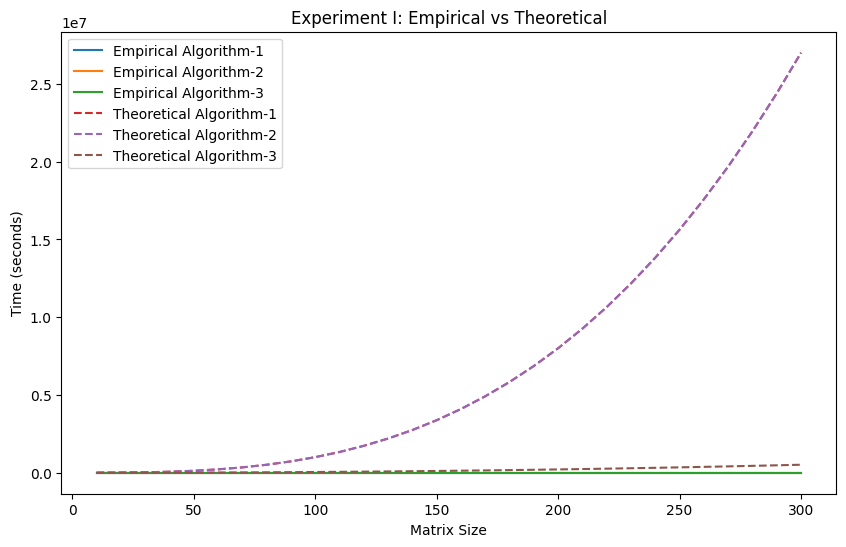

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(df['Size'], df['Empirical Algorithm-1'], label='Empirical Algorithm-1')
plt.plot(df['Size'], df['Empirical Algorithm-2'], label='Empirical Algorithm-2')
plt.plot(df['Size'], df['Empirical Algorithm-3'], label='Empirical Algorithm-3')
plt.plot(df['Size'], df['Theoretical-1'], label='Theoretical Algorithm-1', linestyle='--')
plt.plot(df['Size'], df['Theoretical-2'], label='Theoretical Algorithm-2', linestyle='--')
plt.plot(df['Size'], df['Theoretical-3'], label='Theoretical Algorithm-3', linestyle='--')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title('Experiment I: Empirical vs Theoretical')
plt.legend()
plt.show()

#### Adjusted the results so I could visualize the changes.<br>Theoretical-1/300000, Theoretical-2/100000, Theoretical-3/100000

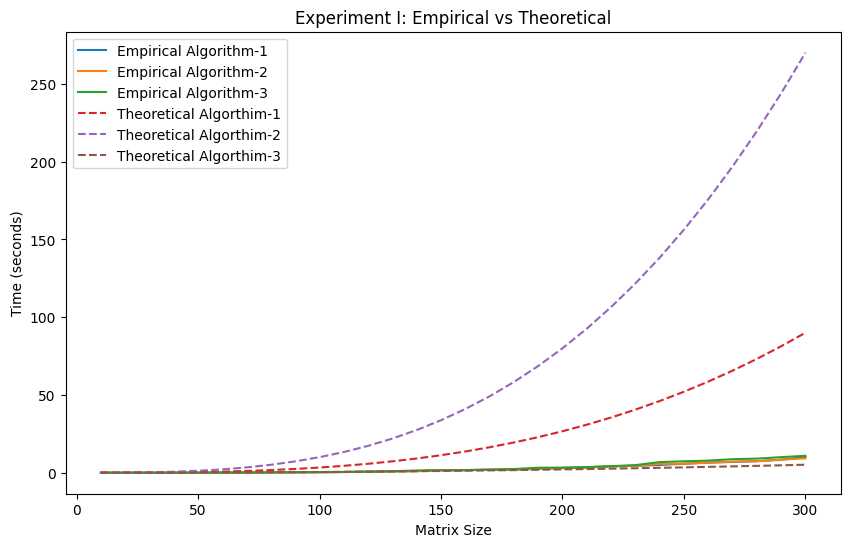

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(df['Size'], df['Empirical Algorithm-1'], label='Empirical Algorithm-1')
plt.plot(df['Size'], df['Empirical Algorithm-2'], label='Empirical Algorithm-2')
plt.plot(df['Size'], df['Empirical Algorithm-3'], label='Empirical Algorithm-3')
plt.plot(df['Size'], df['Theoretical-1']/300000, label='Theoretical Algorthim-1', linestyle='--')
plt.plot(df['Size'], df['Theoretical-2']/100000, label='Theoretical Algorthim-2', linestyle='--')
plt.plot(df['Size'], df['Theoretical-3']/100000, label='Theoretical Algorthim-3', linestyle='--')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title('Experiment I: Empirical vs Theoretical')
plt.legend()
plt.show()

# Experiment II

#### Generate matrices and measure execution time

In [46]:
sizes = [2**i for i in range(10)]
data = []

for size in sizes:
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)
    
    start = time.time()
    result1 = Algorithm1(A, B)
    end = time.time()
    time1 = end - start
    
    start = time.time()
    result3 = Algorithm3(A, B)
    end = time.time()
    time3 = end - start
    
    start = time.time()
    result4 = Algorithm4(A, B)
    end = time.time()
    time4 = end - start

    start = time.time()
    result5 = Algorithm5(A, B)
    end = time.time()
    time5 = end - start

    theoretical_time1 = size**3
    theoretical_time3 = (size**2) * math.log(size)
    theoretical_time4 = size**2
    theoretical_time5 = size**2
    
    data.append([size, time1, time3, time4, time5, theoretical_time1, theoretical_time3, theoretical_time4, theoretical_time5])

#### Create DataFrame and Print

In [47]:
df = pd.DataFrame(data, columns=['Size', 'Empirical Algorithm-1', 'Empirical Algorithm-3', 'Empirical Algorithm-4', 'Empirical Algorithm-5', 'Theoretical-1', 'Theoretical-3', 'Theoretical-4', 'Theoretical-5'])
print(df)

   Size  Empirical Algorithm-1  Empirical Algorithm-3  Empirical Algorithm-4  \
0     1               0.000000               0.000000               0.000000   
1     2               0.000000               0.000000               0.000000   
2     4               0.000000               0.000000               0.001063   
3     8               0.000000               0.000892               0.001097   
4    16               0.002574               0.003102               0.008366   
5    32               0.012619               0.015000               0.055479   
6    64               0.091363               0.116554               0.389875   
7   128               0.758093               0.929090               3.363568   
8   256               6.083267               7.770747              25.021826   
9   512              51.012498              59.110412             204.999185   

   Empirical Algorithm-5  Theoretical-1  Theoretical-3  Theoretical-4  \
0               0.000000              1   0.00

#### Plot the results
# <br>Non Adjusted

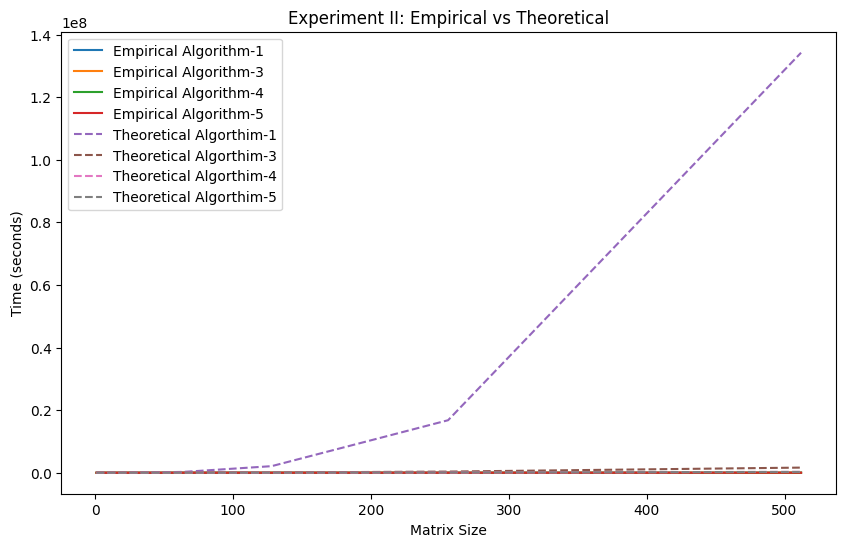

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(df['Size'], df['Empirical Algorithm-1'], label='Empirical Algorithm-1')
plt.plot(df['Size'], df['Empirical Algorithm-3'], label='Empirical Algorithm-3')
plt.plot(df['Size'], df['Empirical Algorithm-4'], label='Empirical Algorithm-4')
plt.plot(df['Size'], df['Empirical Algorithm-5'], label='Empirical Algorithm-5')
plt.plot(df['Size'], df['Theoretical-1'], label='Theoretical Algorthim-1', linestyle='--')
plt.plot(df['Size'], df['Theoretical-3'], label='Theoretical Algorthim-3', linestyle='--')
plt.plot(df['Size'], df['Theoretical-4'], label='Theoretical Algorthim-4', linestyle='--')
plt.plot(df['Size'], df['Theoretical-5'], label='Theoretical Algorthim-5', linestyle='--')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title('Experiment II: Empirical vs Theoretical')
plt.legend()
plt.show()

# Adjusted the results so I could visualize the changes. <br>Theoretical-1/300000, Theoretical-3/100000, Theoretical-4/100000, Theoretical-5/100000

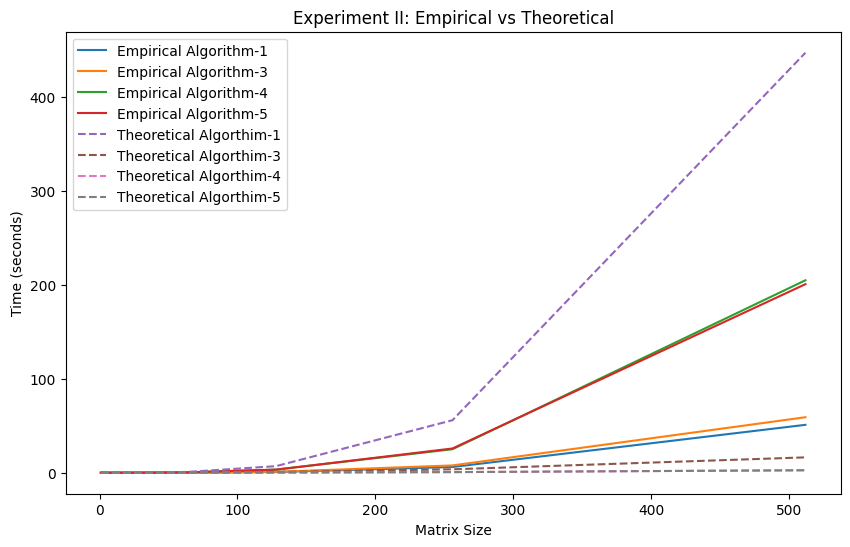

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(df['Size'], df['Empirical Algorithm-1'], label='Empirical Algorithm-1')
plt.plot(df['Size'], df['Empirical Algorithm-3'], label='Empirical Algorithm-3')
plt.plot(df['Size'], df['Empirical Algorithm-4'], label='Empirical Algorithm-4')
plt.plot(df['Size'], df['Empirical Algorithm-5'], label='Empirical Algorithm-5')
plt.plot(df['Size'], df['Theoretical-1']/300000, label='Theoretical Algorthim-1', linestyle='--')
plt.plot(df['Size'], df['Theoretical-3']/100000, label='Theoretical Algorthim-3', linestyle='--')
plt.plot(df['Size'], df['Theoretical-4']/100000, label='Theoretical Algorthim-4', linestyle='--')
plt.plot(df['Size'], df['Theoretical-5']/100000, label='Theoretical Algorthim-5', linestyle='--')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title('Experiment II: Empirical vs Theoretical')
plt.legend()
plt.show()

# Matrix-Chain Multiplication Problem

#### Generate Matrix Chains

In [27]:
def generate_matrix_chain(j):
    p = [random.randint(10, j * 10) for _ in range(11)]
    matrices = [np.random.rand(p[i], p[i+1]) for i in range(10)]
    return p, matrices

matrix_chains = [generate_matrix_chain(j) for j in range(2, 21)]

#### Matrix-Chain-Order Algorithm

In [28]:
def matrix_chain_order(p):
    n = len(p) - 1
    m = [[0 for _ in range(n)] for _ in range(n)]
    s = [[0 for _ in range(n)] for _ in range(n)]

    for l in range(2, n + 1):
        for i in range(n - l + 1):
            j = i + l - 1
            m[i][j] = float('inf')
            for k in range(i, j):
                q = m[i][k] + m[k + 1][j] + p[i] * p[k + 1] * p[j + 1]
                if q < m[i][j]:
                    m[i][j] = q
                    s[i][j] = k

    return m, s

#### Generating the matrix chain

In [29]:
def chain_matrix_multiply(matrices, s, i, j):
    if i == j:
        return matrices[i]
    else:
        left = chain_matrix_multiply(matrices, s, i, s[i][j])
        right = chain_matrix_multiply(matrices, s, s[i][j] + 1, j)
        return np.dot(left, right)

#### Execution Times of sequential and optimal order

In [30]:
def measure_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    return end_time - start_time, result

def sequential_multiply(matrices):
    result = matrices[0]
    for i in range(1, len(matrices)):
        result = np.dot(result, matrices[i])
    return result

data = []

for j in range(2, 21):
    p, matrices = matrix_chains[j-2]
    
    # Sequential multiplication
    t1, _ = measure_time(sequential_multiply, matrices)
    
    # Optimal multiplication
    m, s = matrix_chain_order(p)
    t2, _ = measure_time(chain_matrix_multiply, matrices, s, 0, len(matrices) - 1)
    
    data.append([j, j * 10, t1, t2])

#### Create DataFrame

In [31]:
df = pd.DataFrame(data, columns=['Matrix Chain ID', 'Upper Bound', 'Sequential Time', 'Optimal Time'])

#### Print the DataFrame

In [32]:
print(df)

    Matrix Chain ID  Upper Bound  Sequential Time  Optimal Time
0                 2           20         0.000000           0.0
1                 3           30         0.000000           0.0
2                 4           40         0.000000           0.0
3                 5           50         0.000000           0.0
4                 6           60         0.000000           0.0
5                 7           70         0.000000           0.0
6                 8           80         0.000000           0.0
7                 9           90         0.000000           0.0
8                10          100         0.000000           0.0
9                11          110         0.000000           0.0
10               12          120         0.000000           0.0
11               13          130         0.000000           0.0
12               14          140         0.000000           0.0
13               15          150         0.000000           0.0
14               16          160        

#### Plotting the Results

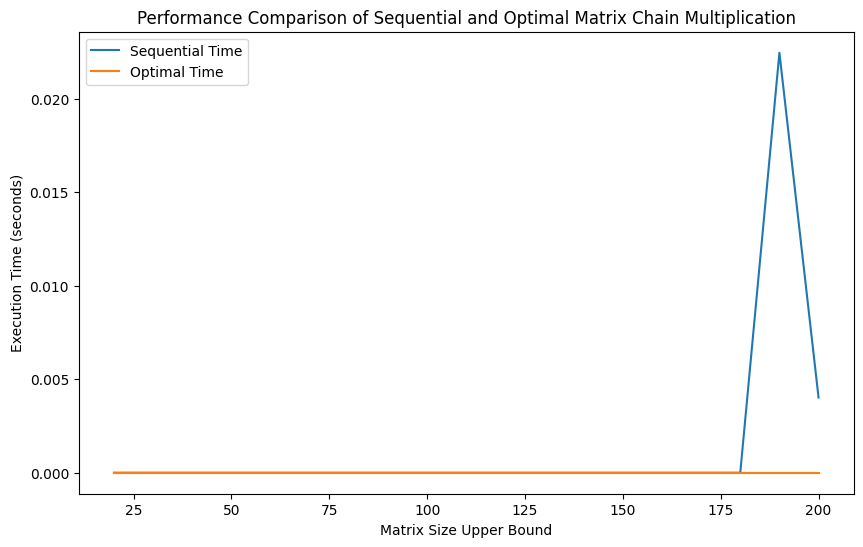

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df['Upper Bound'], df['Sequential Time'], label='Sequential Time')
plt.plot(df['Upper Bound'], df['Optimal Time'], label='Optimal Time')
plt.xlabel('Matrix Size Upper Bound')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison of Sequential and Optimal Matrix Chain Multiplication')
plt.legend()
plt.show()